# Custom Widget
## Exploring the Lorenz System of Differential Equations

In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

This is one of the classic systems in non-linear differential equations. It exhibits a range of different behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied.

## Imports

First, we import the needed things from IPython, [NumPy](http://www.numpy.org/), [Matplotlib](http://matplotlib.org/index.html) and [SciPy](http://www.scipy.org/). Check out the class [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/) if you're interested in learning more about this part of Python!

In [8]:
%matplotlib inline

In [9]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [10]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [20]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

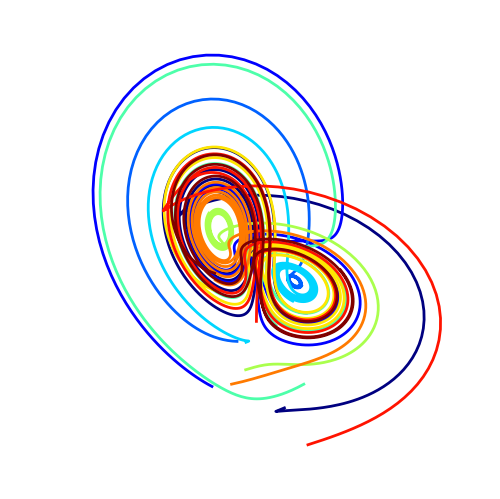

In [21]:
t, x_t = solve_lorenz(angle=0, N=10)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

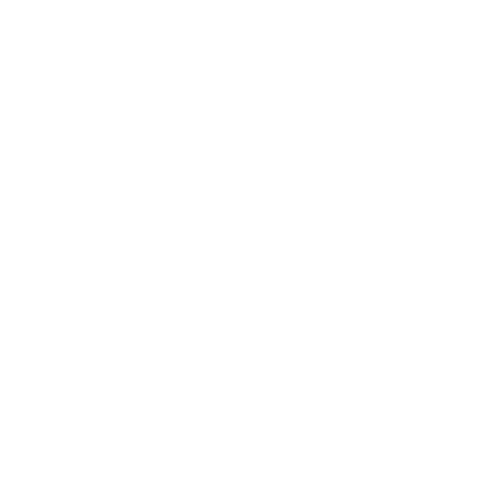

In [13]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [14]:
t, x_t = w.result

In [15]:
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6666666666666665,
 'rho': 28.0}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [16]:
xyz_avg = x_t.mean(axis=1)

In [17]:
xyz_avg.shape

(10, 3)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

*NOTE: These will look different from the lecture version if you adjusted any of the sliders in the* `interactive` *widget and changed the parameters.*

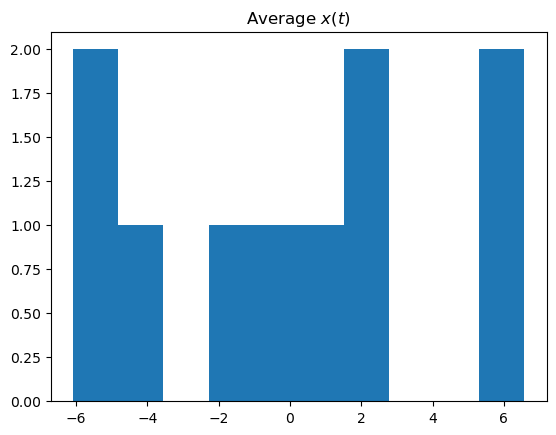

In [18]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

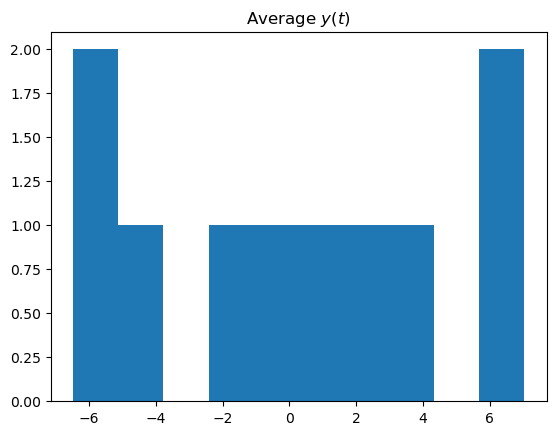

In [19]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');

# Conclusion

Hopefully you've enjoyed using widgets in the Jupyter Notebook system and have begun to explore the other GUI possibilities for Python!